# Plotting RVs for each order

Used for comparison purpose with various metrics.


In [44]:
import os
import glob
import numpy as np
import pandas as pd
from astropy.io import fits
import matplotlib.pyplot as plt
import tamar.tools.plotting_funcs as plot
from tamar.tools.settings import CsvDir

Read in a fits file to get colormap!

In [45]:
neid_days = os.listdir(CsvDir.NEID_SOLAR)

date = neid_days[0]
file = os.path.join(CsvDir.NEID_SOLAR, date, 'level2', date)
spec_fits_files = [i for i in glob.glob(os.path.join(file, '*.fits'))]

Get wavelength colormap

In [46]:
# science fiber
fib = 'SCI'

# wavelength extension
fits_extension_wavelength = fib + 'WAVE'

# wavelength list in nm
wvl = fits.getdata(spec_fits_files[0], fits_extension_wavelength) / 10.

Read in RV data

Read in velocities from csv.

In [47]:
# csv file with rv components
csv_file = os.path.join(CsvDir.NEID_CALC, 'order_rvs.csv')


Get component lists.

In [48]:
# create pandas dataframe
component_df = pd.read_csv(csv_file)

# get dates list
dates = component_df.date_obs.values
date_jd = component_df.date_jd.values
date_plot = date_jd - date_jd[0]

# get velocities lists
# v_phot = component_df.v_phot.values
# v_conv = component_df.v_conv.values
rv_sun = component_df.rv_sun.values * 1000
rv_error = component_df.rv_error.values
# rv_model  = component_df.rv_model.values

# get magnetic observables
# f = component_df.f.values
# Bobs = component_df.Bobs.values
# f_bright = component_df.f_bright.values
# f_spot = component_df.f_spot.values


Get calculation info from calculation csv.

In [ ]:
# data csv
csv_file = os.path.join(CsvDir.NEID_CALC, 'rvs.csv')

# create pandas dataframe
component_df = pd.read_csv(csv_file)

# get dates list
# dates = component_df.date_obs.values
# date_jd = component_df.date_jd.values
# date_plot = date_jd - date_jd[0]

# get velocities lists
v_phot = component_df.v_phot.values[0:len(dates)]
v_conv = component_df.v_conv.values[0:len(dates)]
# rv_sun = component_df.rv_sun.values * 1000
# rv_error = component_df.rv_error.values
rv_model  = component_df.rv_model.values[0:len(dates)]

# get magnetic observables
f = component_df.f.values[0:len(dates)]
Bobs = component_df.Bobs.values[0:len(dates)]
f_bright = component_df.f_bright.values[0:len(dates)]
f_spot = component_df.f_spot.values[0:len(dates)]


Get RVs for each order.

In [49]:
rv_orders = []
order_numbers = np.arange(57, 170)
for i in order_numbers:
    i = str(i)
    i = i.zfill(3)
    rv_orders.append(component_df[i])


Plotting wavelength RVs

/Users/tervin/opt/anaconda3/envs/neid_data/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Users/tervin/opt/anaconda3/envs/neid_data/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


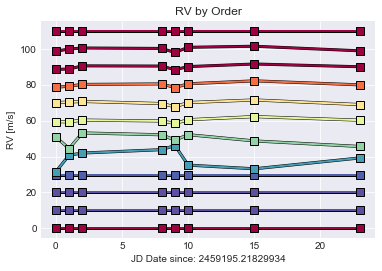

In [51]:
nord = len(order_numbers)
cmap = plt.get_cmap('Spectral')
plt.style.use('seaborn-darkgrid')

for ind, order in enumerate(range(nord)):
    wvl_norm = 1. - (np.mean(wvl[ind,:]) - 420.) / (720. - 420.)
    if np.floor(ind/10.) == ind/10.:
        if rv_orders[ind].any() is not None:
            rv_ord = rv_orders[ind] * 1e3 # convert to m/s
            rv_ord_plot = rv_ord - np.median(rv_ord) + ind # offset the median value for plotting purposes
            plt.plot(date_plot, rv_ord_plot, 'k', lw=3)
            plt.plot(date_plot, rv_ord_plot, c=cmap(wvl_norm), lw=2)
            plt.plot(date_plot, rv_ord_plot,'s', c=cmap(wvl_norm),
                     markersize=8,markeredgewidth=1,markeredgecolor='k')
plt.xlabel('JD Date since: ' + str(date_jd[0]))
plt.ylabel('RV [m/s]')
plt.title('RV by Order')
plt.show()